In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
plt.style.use({'figure.figsize':(10, 8)})
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
from IPython.core.display import display, HTML
display(HTML('<style>.container{width:100% !important;}</style>'))
import warnings
warnings.filterwarnings("ignore")

/tmp/ipykernel_2266315/2343018592.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [28]:
from datetime import datetime
from matplotlib.colors import LinearSegmentedColormap

# 假设已经定义了 rank_files_by_date 函数
def extract_date_from_filename(filename):
    try:
        date_str = '-'.join(filename.split('-')[1:]).split('.')[0]
        return datetime.strptime(date_str, '%Y-%m-%d')
    except Exception as e:
        print(f"处理文件名 {filename} 时出错: {e}")
        return None

def rank_files_by_date(file_list):
    sorted_files = sorted(file_list, key=extract_date_from_filename)
    return sorted_files

def generate_custom_color_gradient(colors, n_colors):
    """Generate a gradient of colors from light to dark based on custom colors."""
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    return [cmap(i / (n_colors - 1)) for i in range(n_colors)]

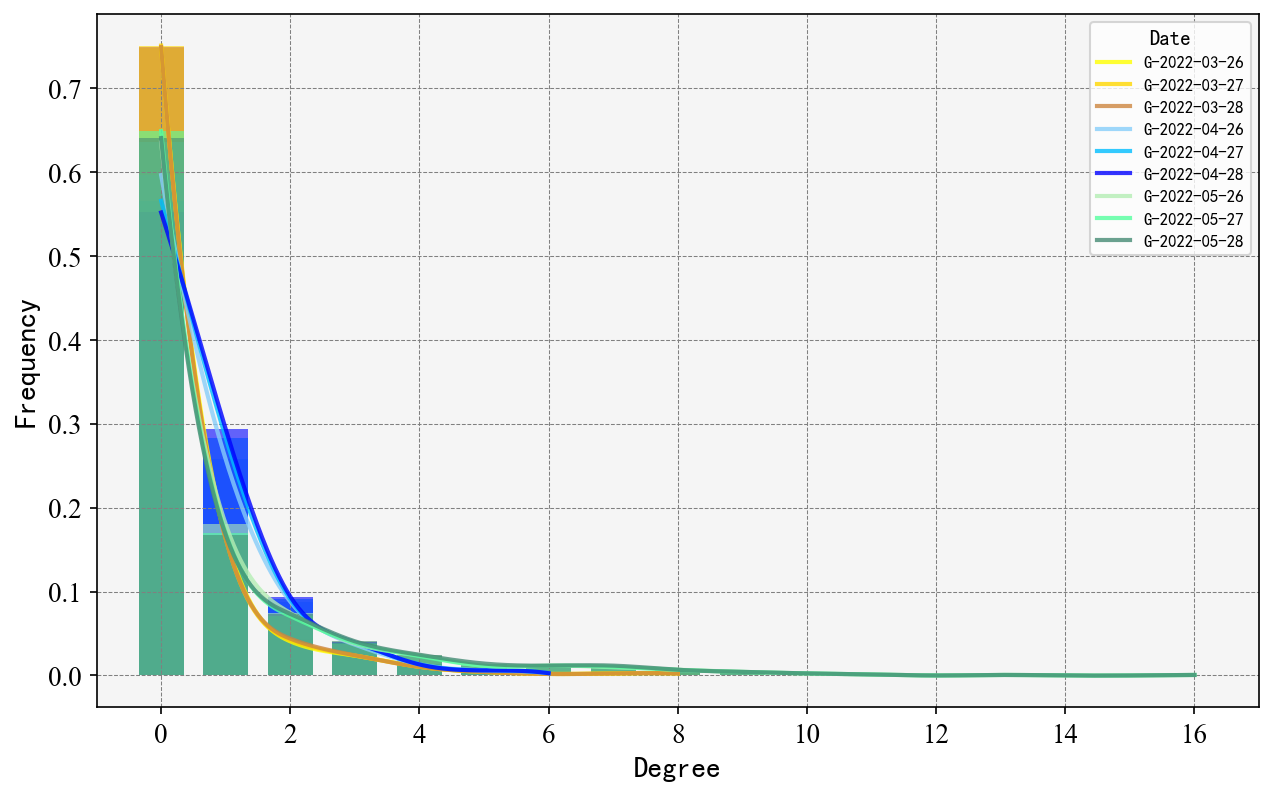

Degree distribution plots for all files saved on one graph as bar plot with curves.


In [44]:
from datetime import datetime
from matplotlib.colors import LinearSegmentedColormap

# 假设已经定义了 rank_files_by_date 函数
def extract_date_from_filename(filename):
    try:
        date_str = '-'.join(filename.split('-')[1:]).split('.')[0]
        return datetime.strptime(date_str, '%Y-%m-%d')
    except Exception as e:
        print(f"处理文件名 {filename} 时出错: {e}")
        return None

def rank_files_by_date(file_list):
    sorted_files = sorted(file_list, key=extract_date_from_filename)
    return sorted_files

def generate_custom_color_gradient(colors, n_colors):
    """Generate a gradient of colors from light to dark based on custom colors."""
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    return [cmap(i / (n_colors - 1)) for i in range(n_colors)]
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import pandas as pd
from scipy.interpolate import make_interp_spline
os.chdir(r'/home/root_gdut/KDD2025/old/折线图/1/yin')
files = [f for f in os.listdir() if f.startswith('G-') and f.endswith('.csv')]
files = rank_files_by_date(files)
'''
['G-2022-03-26.csv',
 'G-2022-03-27.csv',
 'G-2022-03-28.csv',
 'G-2022-04-26.csv',
 'G-2022-04-27.csv',
 'G-2022-04-28.csv',
 'G-2022-05-26.csv',
 'G-2022-05-27.csv',
 'G-2022-05-28.csv']
'''
output_dir = 'degree'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def plot_degree_distribution(G, file_name, color):
    degree_histogram = nx.degree_histogram(G)
    x = range(len(degree_histogram))
    y = [z / float(sum(degree_histogram)) for z in degree_histogram]

    x_smooth = np.linspace(min(x), max(x), 300)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)

    plt.bar(x, y, width=0.7, label=f"{file_name} Bar", color=color, alpha=0.6)
    plt.plot(x_smooth, y_smooth, label=f"{file_name} Curve", color=color, linewidth=2, alpha=0.8)
    plt.xlim(-1, 17)
# 定义鲜艳的基色和对应的颜色映射
colors_base = [
    ["#FFFF00", "#FFD700", "#CD853F"],  # 橙色系
    ["#87CEFA", "#00BFFF", "#0000FF"],  # 蓝色系
    ["#B4EEB4", "#54FF9F", "#458B74"]]   # 绿色系


# 提取文件的月份信息并分组
file_dates = [extract_date_from_filename(file) for file in files]
months = set()
dates_in_month = {}

for file in files:
    date = extract_date_from_filename(file)
    months.add(date.month)
    if date.month not in dates_in_month:
        dates_in_month[date.month] = []
    dates_in_month[date.month].append(date)

plt.figure(figsize=(10, 6), dpi=150)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel("Degree", size=14)
plt.ylabel("Frequency", size=14)
plt.xticks(fontproperties='Times New Roman', size=13)
plt.yticks(fontproperties='Times New Roman', size=13)
legend_handles = []  # 用于存储图例句柄
for idx, month in enumerate(sorted(months)):
    dates = sorted(dates_in_month[month])
    base_colors = colors_base[idx % len(colors_base)]
    color_gradient = generate_custom_color_gradient(base_colors, len(dates))

    for i, date in enumerate(dates):
        file_name = next((f for f in files if extract_date_from_filename(f) == date), None)
        if not file_name:
            continue

        df = pd.read_csv(file_name, header=None, encoding='utf-8')
        df = df.apply(pd.to_numeric, errors='coerce')
        df = df.dropna(axis=0, how='all').dropna(axis=1, how='all')

        adj_matrix = np.where((df.values > 0) & (df.values <= 1), 1, 0)
        G = nx.from_numpy_array(adj_matrix)

        color = color_gradient[i]
        plot_degree_distribution(G, file_name.split('/')[-1].split('.')[0], color)
        file_name  = file_name.replace('.csv','')
        legend_handles.append(plt.Line2D([0], [0], color=color, lw=2, alpha=0.8, label=f"{file_name}"))


# 添加图例
plt.legend(handles=legend_handles[:9],loc='upper right', fontsize=8, title="Date", title_fontsize=10)

# 添加标题
#plt.title('Implicit Networks Degree Distribution with Color Gradient for Multiple Files', fontsize=14)

# 显示网格线
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
# 添加阴影效果
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
# 保存图像
plt.savefig('/home/root_gdut/KDD2025/old/折线图/plot/all_files_degree_distribution_with_curve_1_yin.png', bbox_inches='tight')
plt.show()
print("Degree distribution plots for all files saved on one graph as bar plot with curves.")

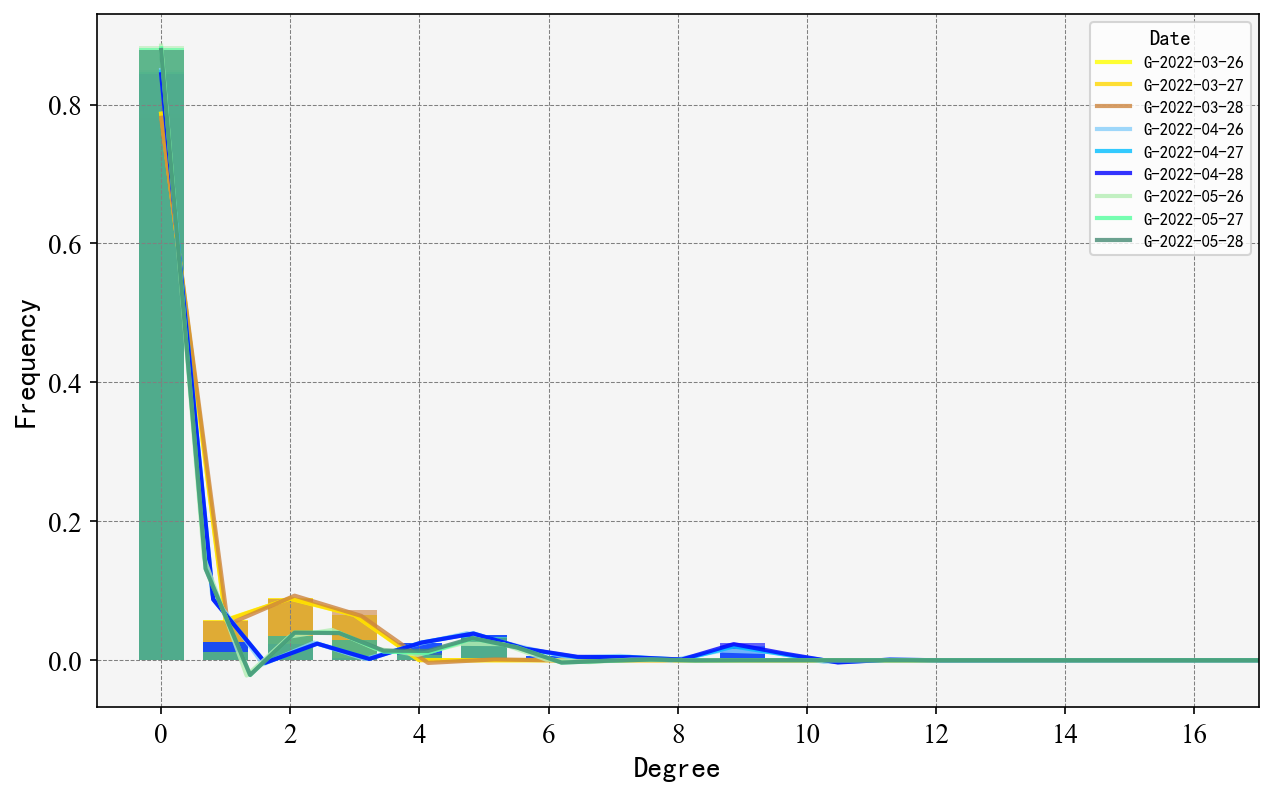

Degree distribution plots for all files saved on one graph as bar plot with curves.


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import pandas as pd
from scipy.interpolate import make_interp_spline

os.chdir(r'/home/root_gdut/KDD2025/old/折线图/1/xian')
files = [f for f in os.listdir() if f.startswith('G-') and f.endswith('.csv')]
files = rank_files_by_date(files)
'''
['G-2022-03-26.csv',
 'G-2022-03-27.csv',
 'G-2022-03-28.csv',
 'G-2022-04-26.csv',
 'G-2022-04-27.csv',
 'G-2022-04-28.csv',
 'G-2022-05-26.csv',
 'G-2022-05-27.csv',
 'G-2022-05-28.csv']
'''

# 提取文件的月份信息并分组
file_dates = [extract_date_from_filename(file) for file in files]
months = set()
dates_in_month = {}

for file in files:
    date = extract_date_from_filename(file)
    months.add(date.month)
    if date.month not in dates_in_month:
        dates_in_month[date.month] = []
    dates_in_month[date.month].append(date)

plt.figure(figsize=(10, 6), dpi=150)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel("Degree", size=14)
plt.ylabel("Frequency", size=14)
plt.xticks(fontproperties='Times New Roman', size=13)
plt.yticks(fontproperties='Times New Roman', size=13)
legend_handles = []  # 用于存储图例句柄
for idx, month in enumerate(sorted(months)):
    dates = sorted(dates_in_month[month])
    base_colors = colors_base[idx % len(colors_base)]
    color_gradient = generate_custom_color_gradient(base_colors, len(dates))

    for i, date in enumerate(dates):
        file_name = next((f for f in files if extract_date_from_filename(f) == date), None)
        if not file_name:
            continue

        df = pd.read_csv(file_name, header=None, encoding='utf-8')
        df = df.apply(pd.to_numeric, errors='coerce')
        df = df.dropna(axis=0, how='all').dropna(axis=1, how='all')

        adj_matrix = np.where((df.values > 0) & (df.values <= 1), 1, 0)
        G = nx.from_numpy_array(adj_matrix)

        color = color_gradient[i]
        plot_degree_distribution(G, file_name.split('/')[-1].split('.')[0], color)
        file_name  = file_name.replace('.csv','')
        legend_handles.append(plt.Line2D([0], [0], color=color, lw=2, alpha=0.8, label=f"{file_name}"))
# 添加图例
plt.legend(handles=legend_handles[:9],loc='upper right', fontsize=8, title="Date", title_fontsize=10)

# 添加标题
#plt.title('Explicit Networks Degree Distribution with Color Gradient for Multiple Files', fontsize=14)

# 显示网格线
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
# 添加阴影效果
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
# 保存图像
plt.savefig('/home/root_gdut/KDD2025/old/折线图/plot/all_files_degree_distribution_with_curve_1_xian.png', bbox_inches='tight')
plt.show()
print("Degree distribution plots for all files saved on one graph as bar plot with curves.")

In [18]:
color_gradient

['#00ff00', '#80ff80', '#ffffff']

In [39]:
files

['G-2022-03-26.csv',
 'G-2022-03-27.csv',
 'G-2022-03-28.csv',
 'G-2022-04-26.csv',
 'G-2022-04-27.csv',
 'G-2022-04-28.csv',
 'G-2022-05-26.csv',
 'G-2022-05-27.csv',
 'G-2022-05-28.csv']

In [3]:
import matplotlib as mpl
print(mpl.get_cachedir())


/home/root_gdut/.cache/matplotlib


Processing file: G-2022-04-28.csv
Processing file: G-2022-03-28.csv
Processing file: G-2022-03-27.csv
Processing file: G-2022-04-26.csv
Processing file: G-2022-05-26.csv
Processing file: G-2022-05-27.csv
Processing file: G-2022-05-28.csv
Processing file: G-2022-04-27.csv
Processing file: G-2022-03-26.csv


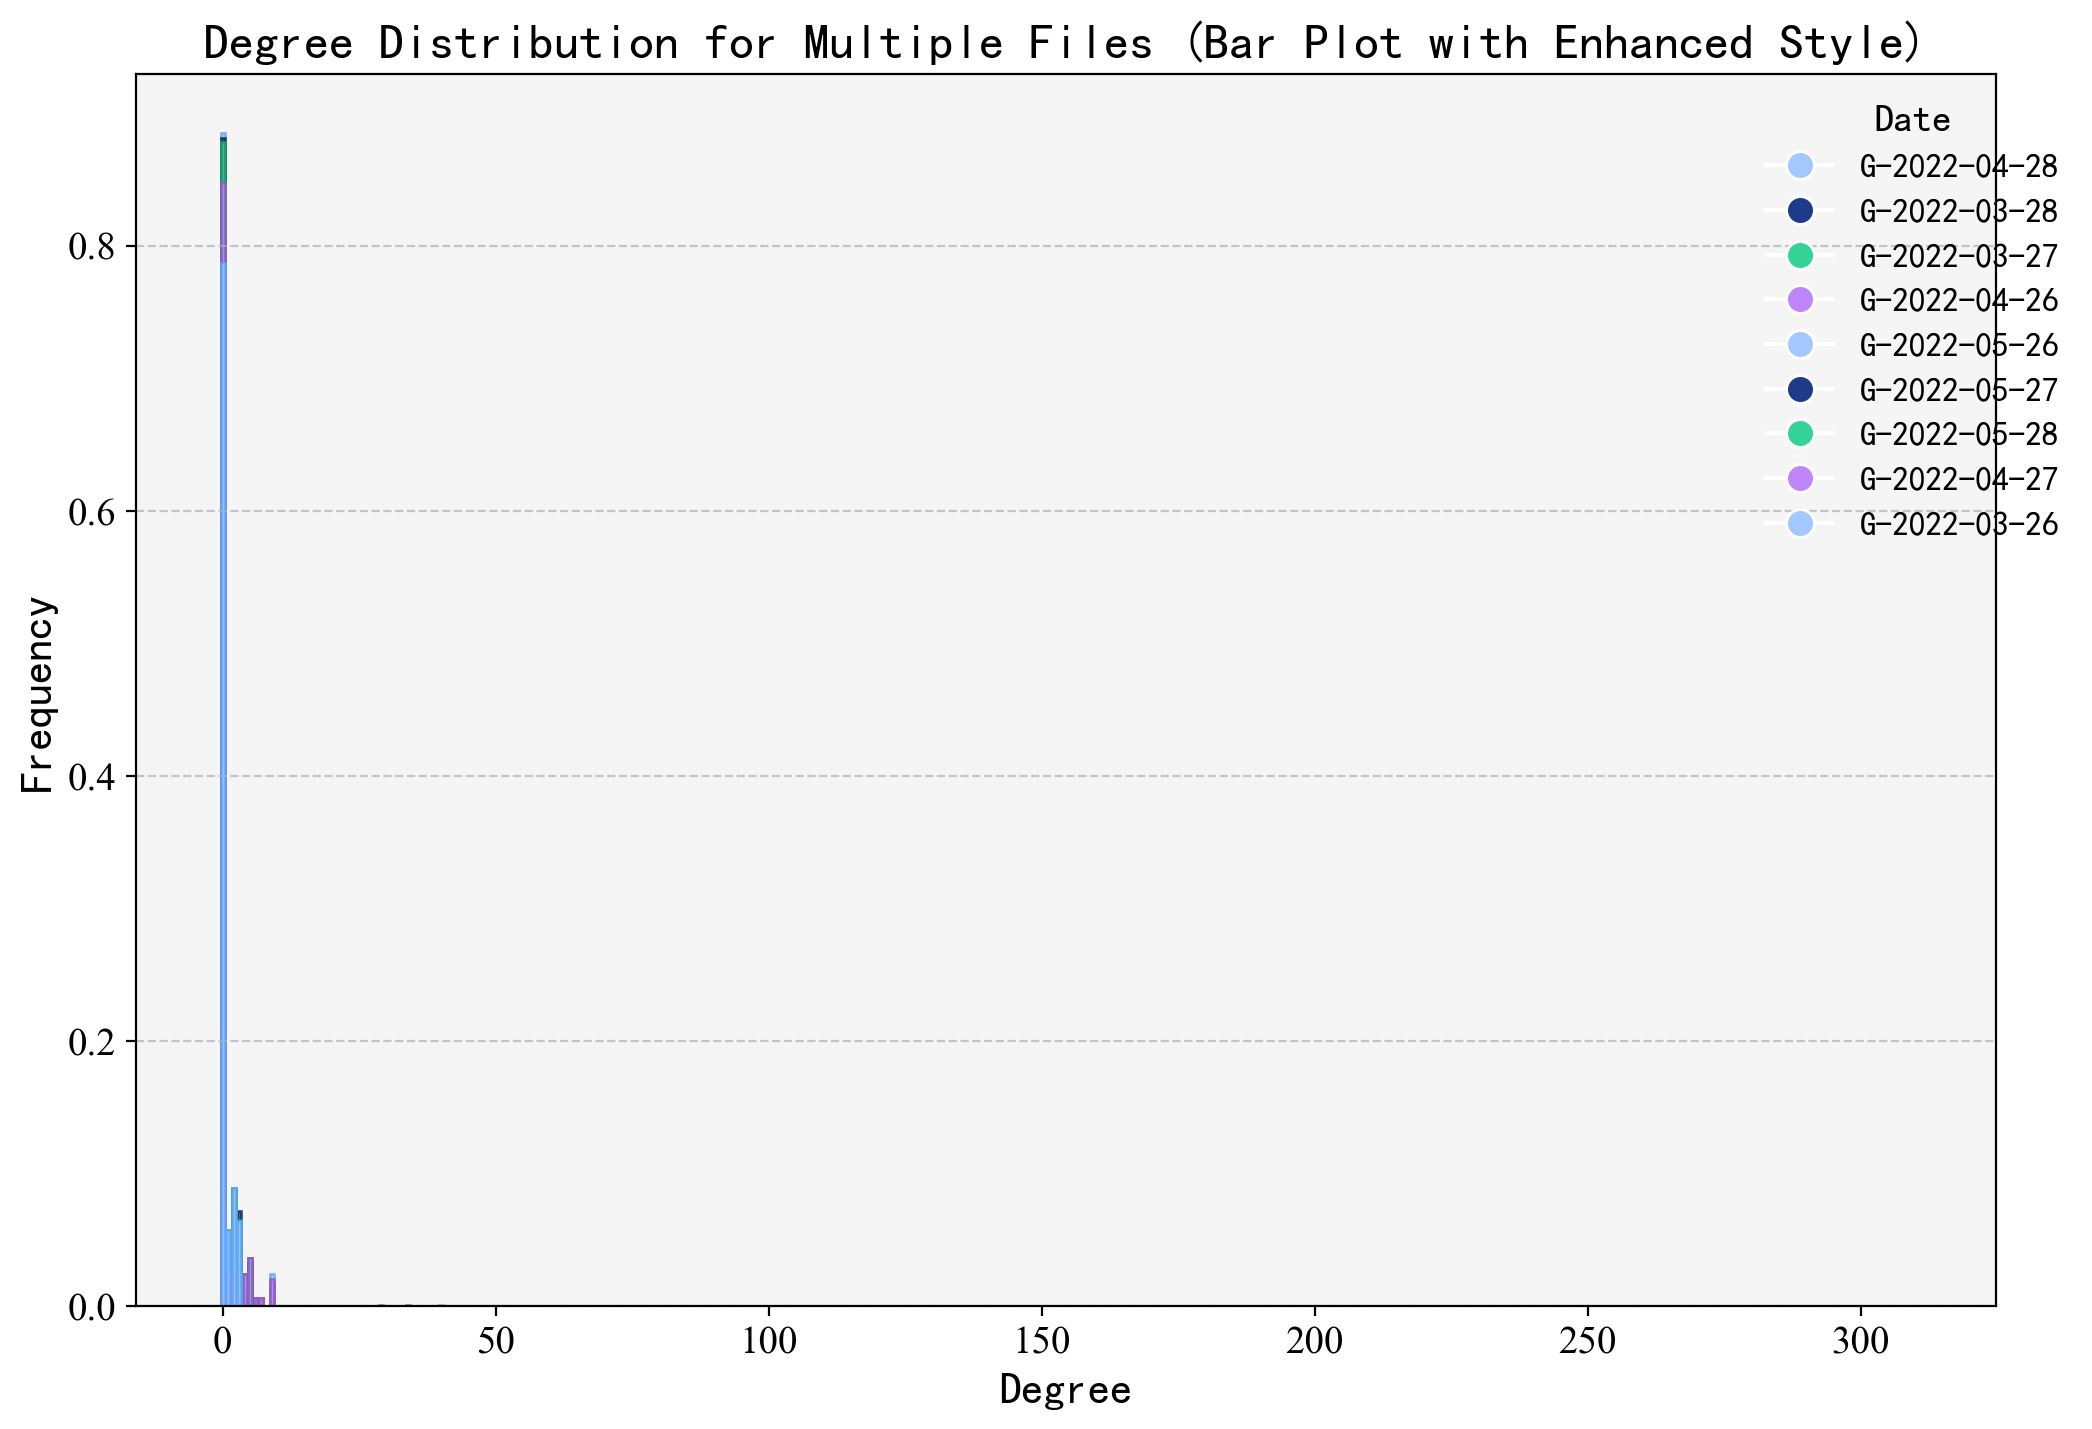

Degree distribution plots for all files saved on one graph with enhanced style.


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
import pandas as pd
from matplotlib.lines import Line2D
os.chdir(r'/home/root_gdut/KDD2025/old/折线图/1/xian')
# 获取当前目录下所有的 G-YYYY-MM-DD 格式的文件
files = [f for f in os.listdir() if f.startswith('G-') and f.endswith('.csv')]

# 创建一个存储度分布图的目录
output_dir = 'degree'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def plot_degree_distribution(G, file_name, color, edge_color, width=0.7, alpha_bar=0.8):
    # 获取度分布数据
    degree_histogram = nx.degree_histogram(G)
    x = range(len(degree_histogram))  # 度值
    y = [z / float(sum(degree_histogram)) for z in degree_histogram]  # 频率

    # 绘制柱状图并添加边框颜色
    plt.bar(x, y, width=width, label=file_name, color=color, edgecolor=edge_color, alpha=alpha_bar)

# 定义柔和协调的颜色和边框颜色
colors = ['#A3C8FF', '#1E3A8A', '#34D399', '#C084FC']  # 淡蓝、深蓝、绿色、淡紫
edge_colors = ['#60A7FF', '#0B2E5A', '#1F9E6A', '#8B5FBF']  # 更深的颜色用于边框

# 如果文件数量超过4个，我们将重复使用这些颜色
if len(files) > len(colors):
    colors = colors * (len(files) // len(colors)) + colors[:len(files) % len(colors)]
    edge_colors = edge_colors * (len(files) // len(edge_colors)) + edge_colors[:len(files) % len(edge_colors)]

# 创建一个图表，绘制所有文件的度分布
plt.figure(figsize=(12, 8), dpi=200)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xlabel("Degree", size=16, weight='bold')
plt.ylabel("Frequency", size=16, weight='bold')
plt.xticks(fontproperties='Times New Roman', size=14)
plt.yticks(fontproperties='Times New Roman', size=14)

# 对每个文件进行处理
for idx, file in enumerate(files):
    print(f"Processing file: {file}")

    # 使用 pandas 读取 CSV 数据，处理为邻接矩阵
    df = pd.read_csv(file, header=None, encoding='utf-8')

    # 确保所有数据都转化为数值类型（无法转换的部分会变为 NaN）
    df = df.apply(pd.to_numeric, errors='coerce')

    # 删除节点名为空的行和列（即所有元素都是 NaN 的行和列）
    df = df.dropna(axis=0, how='all')  # 删除全为空的行
    df = df.dropna(axis=1, how='all')  # 删除全为空的列

    # 转换为无向图的邻接矩阵（假设矩阵中值大于 0 且小于等于 1 表示边的权重）
    adj_matrix = df.values
    adj_matrix = np.where((adj_matrix > 0) & (adj_matrix <= 1), 1, 0)  # 1 表示边，0 表示没有边

    # 构建无向图
    G = nx.from_numpy_array(adj_matrix)

    # 调用绘图函数，将不同文件的度分布绘制在同一张图上
    color = colors[idx % len(colors)]  # 根据文件索引选择颜色
    edge_color = edge_colors[idx % len(edge_colors)]  # 根据文件索引选择边框颜色
    plot_degree_distribution(G, file.split('.')[0], color, edge_color)

# 添加图例（优化）使用小圆圈
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=file.split('.')[0])
    for idx, (file, color) in enumerate(zip(files, colors))
]

plt.legend(
    handles=legend_elements,  # 使用自定义的图例元素
    loc='upper right',  # 图例位置
    bbox_to_anchor=(1.05, 1),  # 确保图例不会遮挡图形
    frameon=False,  # 不显示图例背景框
    fontsize=12,  # 图例字体大小
    title="Date",  # 图例标题
    title_fontsize=14  # 图例标题字体大小
)

# 添加标题
plt.title('Degree Distribution for Multiple Files (Bar Plot with Enhanced Style)', fontsize=18, weight='bold')

# 显示网格线
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.7)

# 添加阴影效果
ax = plt.gca()
ax.set_facecolor('#f5f5f5')



# 保存图像
plt.savefig(f'/home/root_gdut/KDD2025/old/折线图/plot/all_files_degree_distribution_with_enhanced_style_2_xian.png',
            bbox_inches='tight', transparent=True)  # 使用 tight 确保保存时图形完整
plt.show()
plt.close()

print("Degree distribution plots for all files saved on one graph with enhanced style.")